In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [7]:
%matplotlib inline

In [8]:
plt.style.use("seaborn-white")

In [9]:
data_dir = "../Data/Production/"
ibua_df = pd.read_excel(data_dir + "IBUA_production.xlsx")
ibua_df = ibua_df[~ibua_df["Strain"].isin(["IBUA7-9", "IBUA7-9(2)"])]
bd_df = pd.read_excel(data_dir + "23BD_production.xlsx")

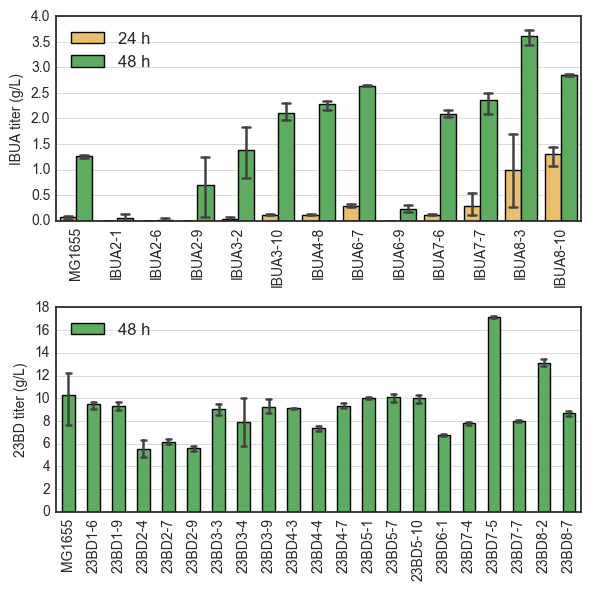

In [10]:
plt.figure(figsize=[6, 6])

plt.subplot(2, 1, 1)

plot_df = ibua_df[["Strain", "Replicate", "24 h", "48 h"]]
plot_df = pd.melt(plot_df, id_vars=["Strain", "Replicate"])
palette = ["#ffc657", "#50b952"]
sbn.barplot(x="Strain", y="value", hue="variable", data=plot_df, palette=palette, capsize=0.2)
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.legend(title=None, loc="upper left")
plt.ylabel("IBUA titer (g/L)")
plt.xlabel("")


plt.subplot(2, 1, 2)

plot_df = bd_df[["Strain", "Replicate", "48 h"]]
plot_df = pd.melt(plot_df, id_vars=["Strain", "Replicate"])
ax = sbn.barplot(x="Strain", y="value", hue="variable", data=plot_df, palette=palette[::-1], capsize=0.2)

width = 0.5
for bar in ax.patches:
    x = bar.get_x()
    old_width = bar.get_width()
    centre = x + old_width / 2.
    
    
    bar.set_x(centre - width / 2.)
    bar.set_width(width)
    
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.legend(title=None, loc="upper left")
plt.ylabel("23BD titer (g/L)")
plt.xlabel("")

plt.tight_layout()

plt.savefig("../Plots/Figure 5 - Production.pdf", bbox_inches="tight")